# Lab for answering question C
Responsible: Moritz
Question: Are there trends visible that could be due to climate change?

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [170]:
transformed_df_serial_path = "../data/data_transformed.pickle"

with open(transformed_df_serial_path, "rb") as file:
    df: pd.DataFrame = pickle.load(file)

assert isinstance(df, pd.DataFrame),f"The serialized object in {transformed_df_serial_path} is not a pandas dataframe!"
assert len(df)!=0, "The serialized dataframe contains no data!"


Dumping all data before 1950 as it is not relevant to climate change.

In [171]:
cutoff_date = 1950 # TODO check
df = df[df["Start_Year"] > cutoff_date]
df

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,Total_Deaths,Total_Affected
203,Natural,Meteorological,Storm,<NA>,<NA>,Bangladesh,BGD,Southern Asia,Asia,<NA>,<NA>,1951,200,<NA>
204,Natural,Hydrological,Landslide,Avalanche,<NA>,Switzerland,CHE,Western Europe,Europe,<NA>,<NA>,1951,92,<NA>
205,Natural,Hydrological,Flood,<NA>,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1951,4800,<NA>
206,Natural,Meteorological,Storm,Convective storm,Tornado,Comoros (the),COM,Eastern Africa,Africa,<NA>,<NA>,1951,500,<NA>
207,Natural,Geophysical,Volcanic activity,Ash fall,<NA>,Indonesia,IDN,South-Eastern Asia,Asia,<NA>,<NA>,1951,1300,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16483,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,8,607
16484,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,5,141
16485,Natural,Biological,Epidemic,Viral disease,<NA>,Zimbabwe,ZWE,Eastern Africa,Africa,<NA>,<NA>,2022,750,6551
16486,Natural,Biological,Epidemic,Viral disease,<NA>,Timor-Leste,TLS,South-Eastern Asia,Asia,<NA>,<NA>,2022,20,1353


## Regarding Groupby and Pandas Datatypes

Pandas usually uses numpy datatypes. However, **numpy integer arrays do not allow for null values (np.nan)**. That's why pandas introduces their own Integer array, which can inlcude null values (pd.NA). However, for groupby operations these pd.NA values can cause problems, so it is advisable to convert back to a numpy float array (which does allow for np.nan) before applying the groupby.

In [172]:
series = pd.Series(np.arange(10)) # just for demonstration

series.astype("int32") # <-- "int32" (small i) = numpy int, no empty values
series.astype("Int32") # <-- "Int32" (big i) = pandas int, allows empty values (pd.NA)
series.astype("float32") # <-- numpy float, allows empty values (np.nan)
pass

In [173]:
groupby_base = df.astype({"Total_Deaths": np.float64, "Total_Affected": np.float64, "Start_Year": np.int32})

groupby_base[["Disaster_Subgroup", "Total_Deaths"]].groupby(["Disaster_Subgroup"]).mean()

,Total_Deaths
Disaster_Subgroup,
Biological,215.732171
Climatological,8430.825095
Extra-terrestrial,NaN
Geophysical,1351.783962
Hydrological,507.803319
Meteorological,312.845705


## Data Exploration

In [174]:
total_disaster_per_year = groupby_base.groupby("Start_Year").size()

Text(0.5, 0, 'Year AC.')

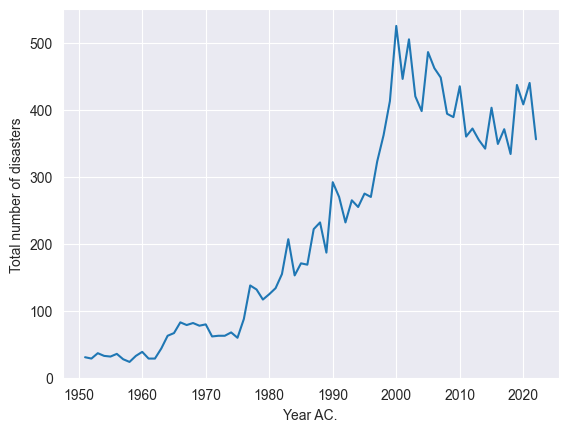

In [175]:
plt.plot(total_disaster_per_year.index, total_disaster_per_year)
plt.ylabel("Total number of disasters")
plt.xlabel("Year AC.")

In [176]:
no_disasters_per_type_and_year = groupby_base.groupby(["Start_Year", "Disaster_Subgroup"]).size().rename("No_Disasters")
display(no_disasters_per_type_and_year.head(40))

rel_change_to_firstrow = no_disasters_per_type_and_year.groupby(level=[1], group_keys=False)
#.apply(lambda x: (x.div(x.iloc[0]) -1) *100) # TODO missing values in first row?
#display(rel_change_to_firstrow.head(40))

Start_Year  Disaster_Subgroup
1951        Geophysical          10
            Hydrological          8
            Meteorological       13
1952        Geophysical          14
            Hydrological          5
            Meteorological       10
1953        Biological            1
            Geophysical          10
            Hydrological         12
            Meteorological       14
1954        Geophysical           6
            Hydrological         17
            Meteorological       10
1955        Geophysical           7
            Hydrological          5
            Meteorological       20
1956        Climatological        1
            Geophysical           7
            Hydrological         14
            Meteorological       14
1957        Geophysical           8
            Hydrological         11
            Meteorological        9
1958        Geophysical           5
            Hydrological          4
            Meteorological       15
1959        Geophysical           

<AxesSubplot: xlabel='Start_Year', ylabel='No_Disasters'>

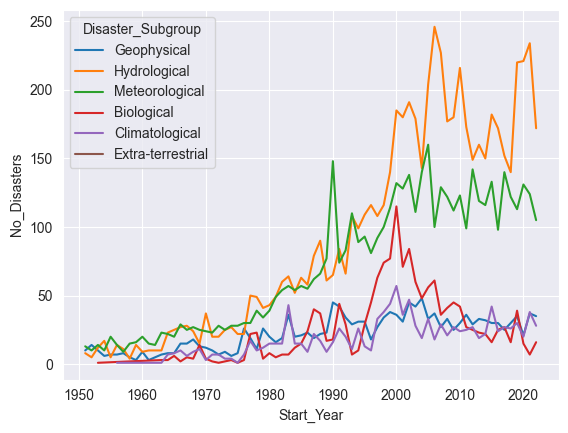

In [177]:
sns.lineplot(data=no_disasters_per_type_and_year.reset_index(), x="Start_Year",y="No_Disasters", hue="Disaster_Subgroup")

In [178]:
sns.lineplot(data=rel_change_to_firstrow.reset_index(), x="Start_Year",y="No_Disasters", hue="Disaster_Subgroup")

AttributeError: 'SeriesGroupBy' object has no attribute 'reset_index'